In [1]:
library(MCMCpack)
library(mvtnorm)
library(rBeta2009)

Warning message:
"package 'MCMCpack' was built under R version 3.6.3"Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2021 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"
Attaching package: 'rBeta2009'

The following object is masked from 'package:MCMCpack':

    rdirichlet

The following object is masked from 'package:stats':

    rbeta



In [2]:
set.seed(50120057)

In [3]:
z = rmultinom(n = 1,size = 3000, prob=c(0.2,0.3,0.5))

#### random하게 3가지 Class를 확률 prob 에 따라 생성한 결과

#### 이를 활용하여 예제를 위한 데이터셋을 생성하자

In [30]:
y= c(rnorm(n = z[1],mean = -4,sd = 0.7),rnorm(n = z[2], mean= 0, sd = 1),rnorm(n = z[3], mean = 4, sd =0.9))

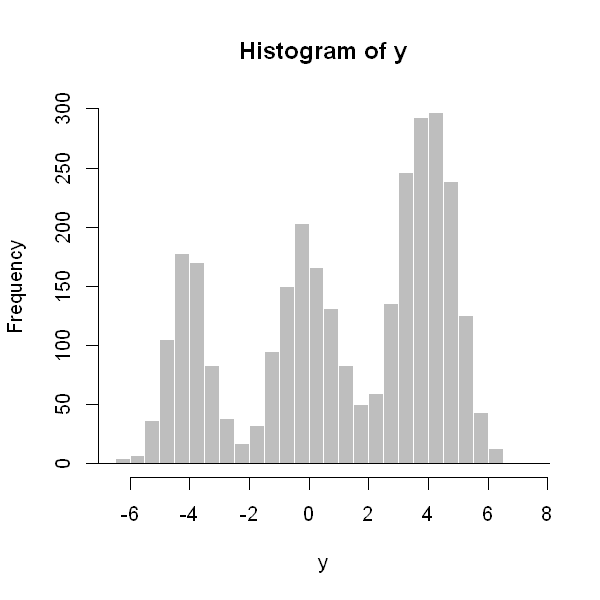

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)
hist(y, col= "grey", border = "white", breaks = 20)
lines(density(y))

#### iteration에서 각 Sample 데이터를 저장할 수 있는 Matrix 생성

In [70]:
K = 3
J = 3000
iter = 10000

In [71]:
z_mat   = matrix(0, ncol = J, nrow = iter)
pi_mat  = matrix(0, ncol = K, nrow = iter)
mu_mat  = matrix(0, ncol = K, nrow = iter)
sig_mat = matrix(0, ncol = K, nrow = iter)

#### starting point를 다양하게 잡고 각 starting point에서 수렴하는지 여부를 체크하기 위해서 동일 시행을 starting point를 바꿔가면서 여러번 수행해야 한다.

#### 여러번 수행한 결과의 matrix를 모아서 보관해야하기 때문에 matrix를 보관할 수 있는 list type을 정의

In [72]:
R = 3 ### 반복 시행횟수

z_list   = list()
pi_list  = list()
mu_list  = list()
sig_list = list()

In [73]:
for(r in 1:3){
  if(r==1){
    pi_mat[1,] =c(0.5,0.3,0.2)
    z_mat[1,] = rbinom(J,1,prob=c(pi_mat[1,]))+1
    mu_mat[1,] = c(0,0.3,0.6)
    sig_mat[1,] = c(0.05,0.05,0.05)
  }
  if(r==2){
    pi_mat[1,] =c(0.5,0.3,0.2)
    z_mat[1,] = rbinom(J,1,prob=c(pi_mat[1,]))+1
    mu_mat[1,] = c(0,0.3,0.6)
    sig_mat[1,] = c(0.05,0.05,0.05)
  }
    if(r==3){
    pi_mat[1,] =c(0.5,0.3,0.2)
    z_mat[1,] = rbinom(J,1,prob=c(pi_mat[1,]))+1
    mu_mat[1,] = c(0,0.3,0.6)
    sig_mat[1,] = c(0.05,0.05,0.05)
  }
  prop = c()
    
  for(t in 2:iter){
    ### gibbs sampler for z ###
    for(j in 1:J){
      for(k in 1:K){
        prop[k] = exp(-1/(2*sig_mat[t-1,k])*(y[j]-mu_mat[t-1,k])^2)*pi_mat[t-1,k]
      }
      z_mat[t,j] = which.max(rmultinom(1,1,prop/(sum(prop))))
    }
    
    ### gibbs sampler for pi ###
    
    pi_mat[t,] = rdirichlet(1,c(sum(z_mat[t,]==1)+1/K, sum(z_mat[t,]==2)+1/K, sum(z_mat[t,]==3)+1/K))
    
    ### gibbs sampler for mu ###
    
    for(k in 1:K){
      sig = (sum(z_mat[t,]==k)/sig_mat[t-1,k] + 1/(100^2))^(-1)
      mu = (sum(y[z_mat[t,]==k])/sig_mat[t-1,k])*sig
      mu_mat[t,k] = rnorm(1,mu,sqrt(sig))
    }
    
    ### gibbs sampler for sigma ###
    for(k in 1:K){
      sig_mat[t,k] = rinvgamma(1,0.5*sum((y[z_mat[t,]==k]-mu_mat[t,k])^2)+1,0.5*sum(z_mat[t,]==k)+10)
      
    }
  }
  z_list[[r]]   = z_mat
  pi_list[[r]]  = pi_mat
  mu_list[[r]]  = mu_mat
  sig_list[[r]] = sig_mat
}

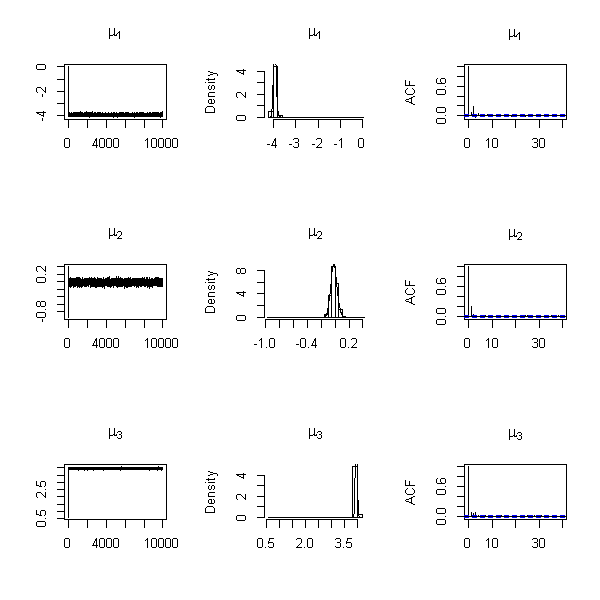

In [74]:
par(mfrow=c(3,3))

ts.plot(mu_list[[1]][,1],type="l",xlab="",ylab="",main=expression(mu[1]))
hist(mu_list[[1]][,1],breaks=20,freq=FALSE,xlab="",main=expression(mu[1]))
lines(density(mu_list[[1]][,1]))
acf(mu_list[[1]][,1],xlab="",main=expression(mu[1]))

ts.plot(mu_list[[1]][,2],type="l",xlab="",ylab="",main=expression(mu[2]))
hist(mu_list[[1]][,2],breaks=20,freq=FALSE,xlab="",main=expression(mu[2]))
lines(density(mu_list[[1]][,2]))
acf(mu_list[[1]][,2],xlab="",main=expression(mu[2]))

ts.plot(mu_list[[1]][,3],type="l",xlab="",ylab="",main=expression(mu[3]))
hist(mu_list[[1]][,3],breaks=20,freq=FALSE,xlab="",main=expression(mu[3]))
lines(density(mu_list[[1]][,3]))
acf(mu_list[[1]][,3],xlab="",main=expression(mu[3]))

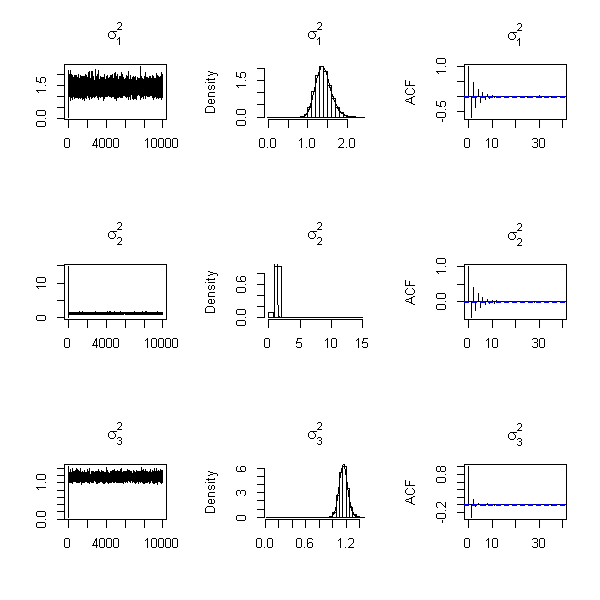

In [75]:
par(mfrow=c(3,3))

ts.plot(sig_list[[1]][,1],type="l",xlab="",ylab="",main=expression(sigma[1]^2))
hist(sig_list[[1]][,1],breaks=20,freq=FALSE,xlab="",main=expression(sigma[1]^2))
lines(density(sig_list[[1]][,1]))
acf(sig_list[[1]][,1],xlab="",main=expression(sigma[1]^2))

ts.plot(sig_list[[1]][,2],type="l",xlab="",ylab="",main=expression(sigma[2]^2))
hist(sig_list[[1]][,2],breaks=20,freq=FALSE,xlab="",main=expression(sigma[2]^2))
lines(density(sig_list[[1]][,2]))
acf(sig_list[[1]][,2],xlab="",main=expression(sigma[2]^2))

ts.plot(sig_list[[1]][,3],type="l",xlab="",ylab="",main=expression(sigma[3]^2))
hist(sig_list[[1]][,3],breaks=20,freq=FALSE,xlab="",main=expression(sigma[3]^2))
lines(density(sig_list[[1]][,3]))
acf(sig_list[[1]][,3],xlab="",main=expression(sigma[3]^2))

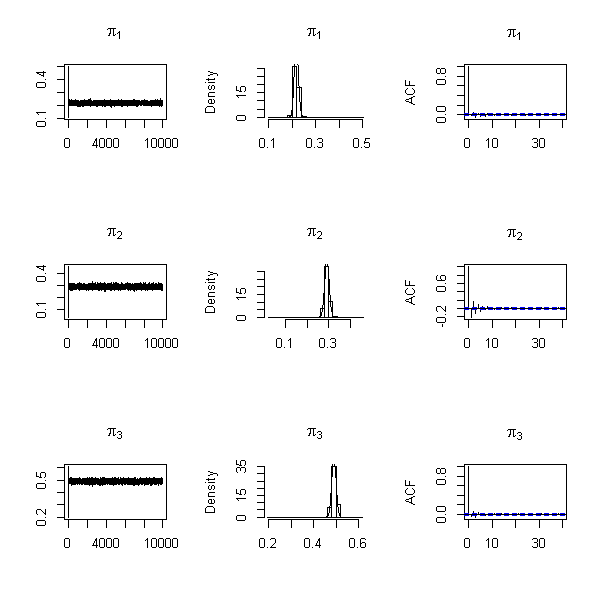

In [76]:
par(mfrow=c(3,3))

ts.plot(pi_list[[1]][,1],type="l",xlab="",ylab="",main=expression(pi[1]))
hist(pi_list[[1]][,1],breaks=20,freq=FALSE,xlab="",main=expression(pi[1]))
lines(density(pi_list[[1]][,1]))
acf(pi_list[[1]][,1],xlab="",main=expression(pi[1]))

ts.plot(pi_list[[1]][,2],type="l",xlab="",ylab="",main=expression(pi[2]))
hist(pi_list[[1]][,2],breaks=20,freq=FALSE,xlab="",main=expression(pi[2]))
lines(density(pi_list[[1]][,2]))
acf(pi_list[[1]][,2],xlab="",main=expression(pi[2]))

ts.plot(pi_list[[1]][,3],type="l",xlab="",ylab="",main=expression(pi[3]))
hist(pi_list[[1]][,3],breaks=20,freq=FALSE,xlab="",main=expression(pi[3]))
lines(density(pi_list[[1]][,3]))
acf(pi_list[[1]][,3],xlab="",main=expression(pi[3]))

In [77]:
colMeans(pi_list[[3]])

[1] 0.2175382 0.2917189 0.4907428

In [79]:
colMeans(sig_list[[1]])

[1] 1.393800 1.175045 1.160568